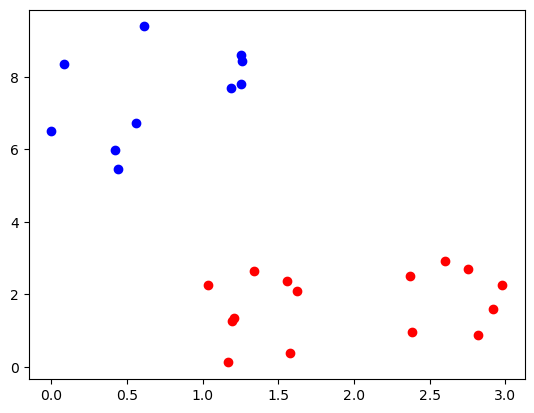

In [4]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
m = 10 # Type A points
p = 15 # Type B points

pointsA = [(3*np.random.rand(), 5*np.random.rand() + 5) for i in range(m)]
pointsB = [(1 + 2*np.random.rand(), 3*np.random.rand()) for i in range(p)]

for i in range(m):
    plt.scatter(pointsA[i][0], pointsA[i][1], color = 'blue')
for i in range(p): 
    plt.scatter(pointsB[i][0], pointsB[i][1], color = 'red')
    

In [7]:
# variable decleration
w = cp.Variable((2,1))
beta = cp.Variable(1)

# objective
obj = cp.Minimize(cp.norm(w))

#constraints
constraints = [w.T@[pointsA[i]] + beta <= -1 for i in range(m)] + [w.T@[pointsB[i]] + beta >= 1 for i in range(p)]

# problem
problem = cp.Problem(obj, constraints)

#solve & report
print(problem.solve())
print(problem.status)
print(problem.solver_stats.solve_time)
print(w.value, beta.value)

0.6741103163059198
optimal
0.0002466
[[ 0.2043527 ]
 [-0.64238983]] [2.41856613]


C:\Users\beyza\anaconda3\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


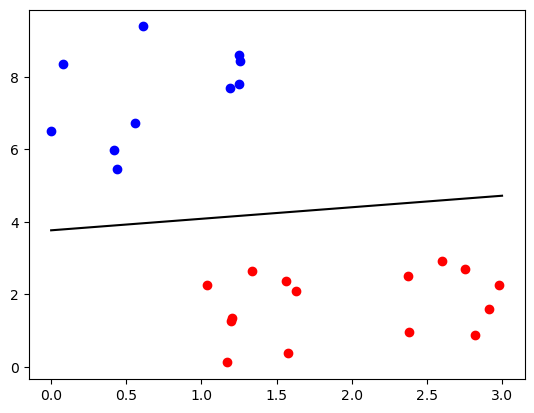

In [13]:
for i in range(m):
    plt.scatter(pointsA[i][0], pointsA[i][1], color = 'blue')
for i in range(p): 
    plt.scatter(pointsB[i][0], pointsB[i][1], color = 'red')
    
x = np.linspace(0,3,100)
y = -w.value[0]/w.value[1]*x - beta.value/w.value[1]

plt.plot(x,y, color = 'black')
#plt.gca().set_aspect('equal')